## Capítulo 02 - Introdução ao Scikit-Learn e avaliação do modelo

In [1]:
import pandas as pd #preparação dos dados
import numpy as np #cálculo numérico

import matplotlib.pyplot as plt #pacote de plotagem 
#A próxima linha ajuda a renderizar plotagens 
%matplotlib inline
import matplotlib as mpl #adciona a funcionalidade de plotagem
mpl.rcParams['figure.dpi']=400 #figuras em alta resolução

In [2]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
#Importando a classe
from sklearn.linear_model import LogisticRegression

In [6]:
#criando um objeto
my_lr = LogisticRegression()

In [7]:
#examinando 
my_lr

LogisticRegression()

In [8]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                               max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='warn',
                               tol=0.0001, verbose=0, warm_start=False)

In [9]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [10]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [12]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [14]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)

In [15]:
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [16]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Gerando números aleatórios 

In [18]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]


array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [19]:
type(X)

numpy.ndarray

### Dados para regressão linear

In [20]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

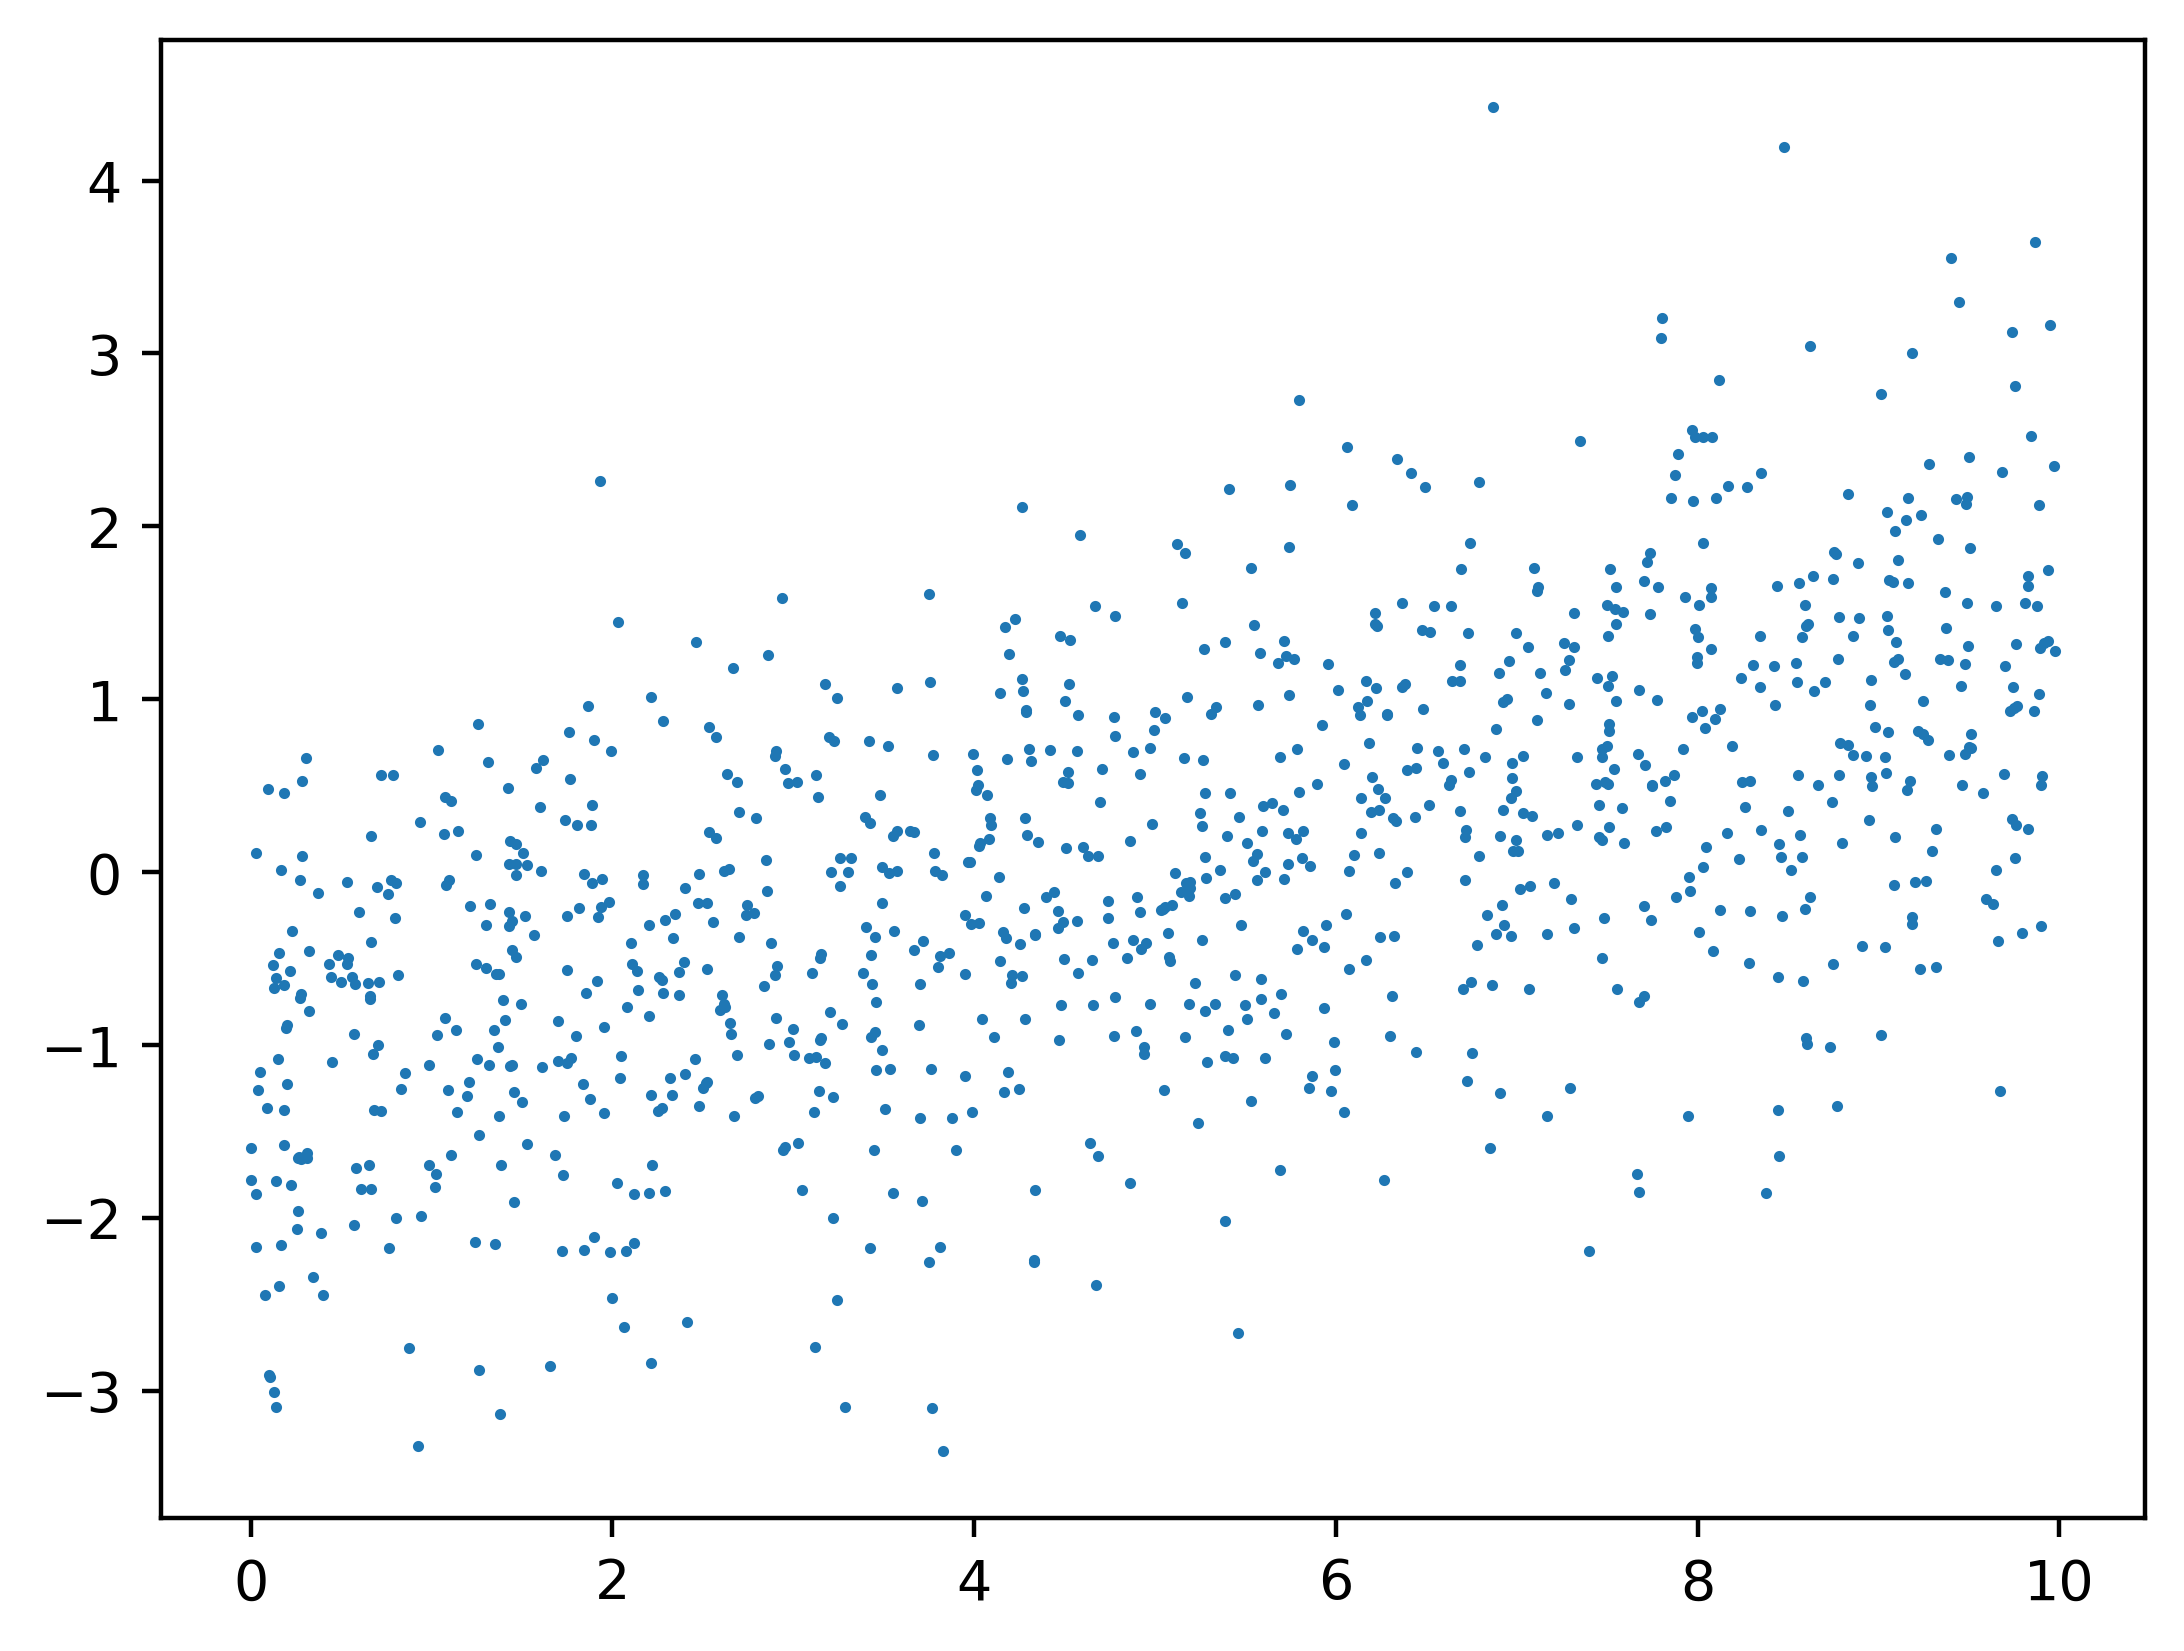

In [21]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)

##  EXERCÍCIO 8: REGRESSÃO LINEAR EM SCIKIT-LEARN

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [23]:
lin_reg

LinearRegression()

In [24]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [25]:
y_pred = lin_reg.predict(X.reshape(-1,1))

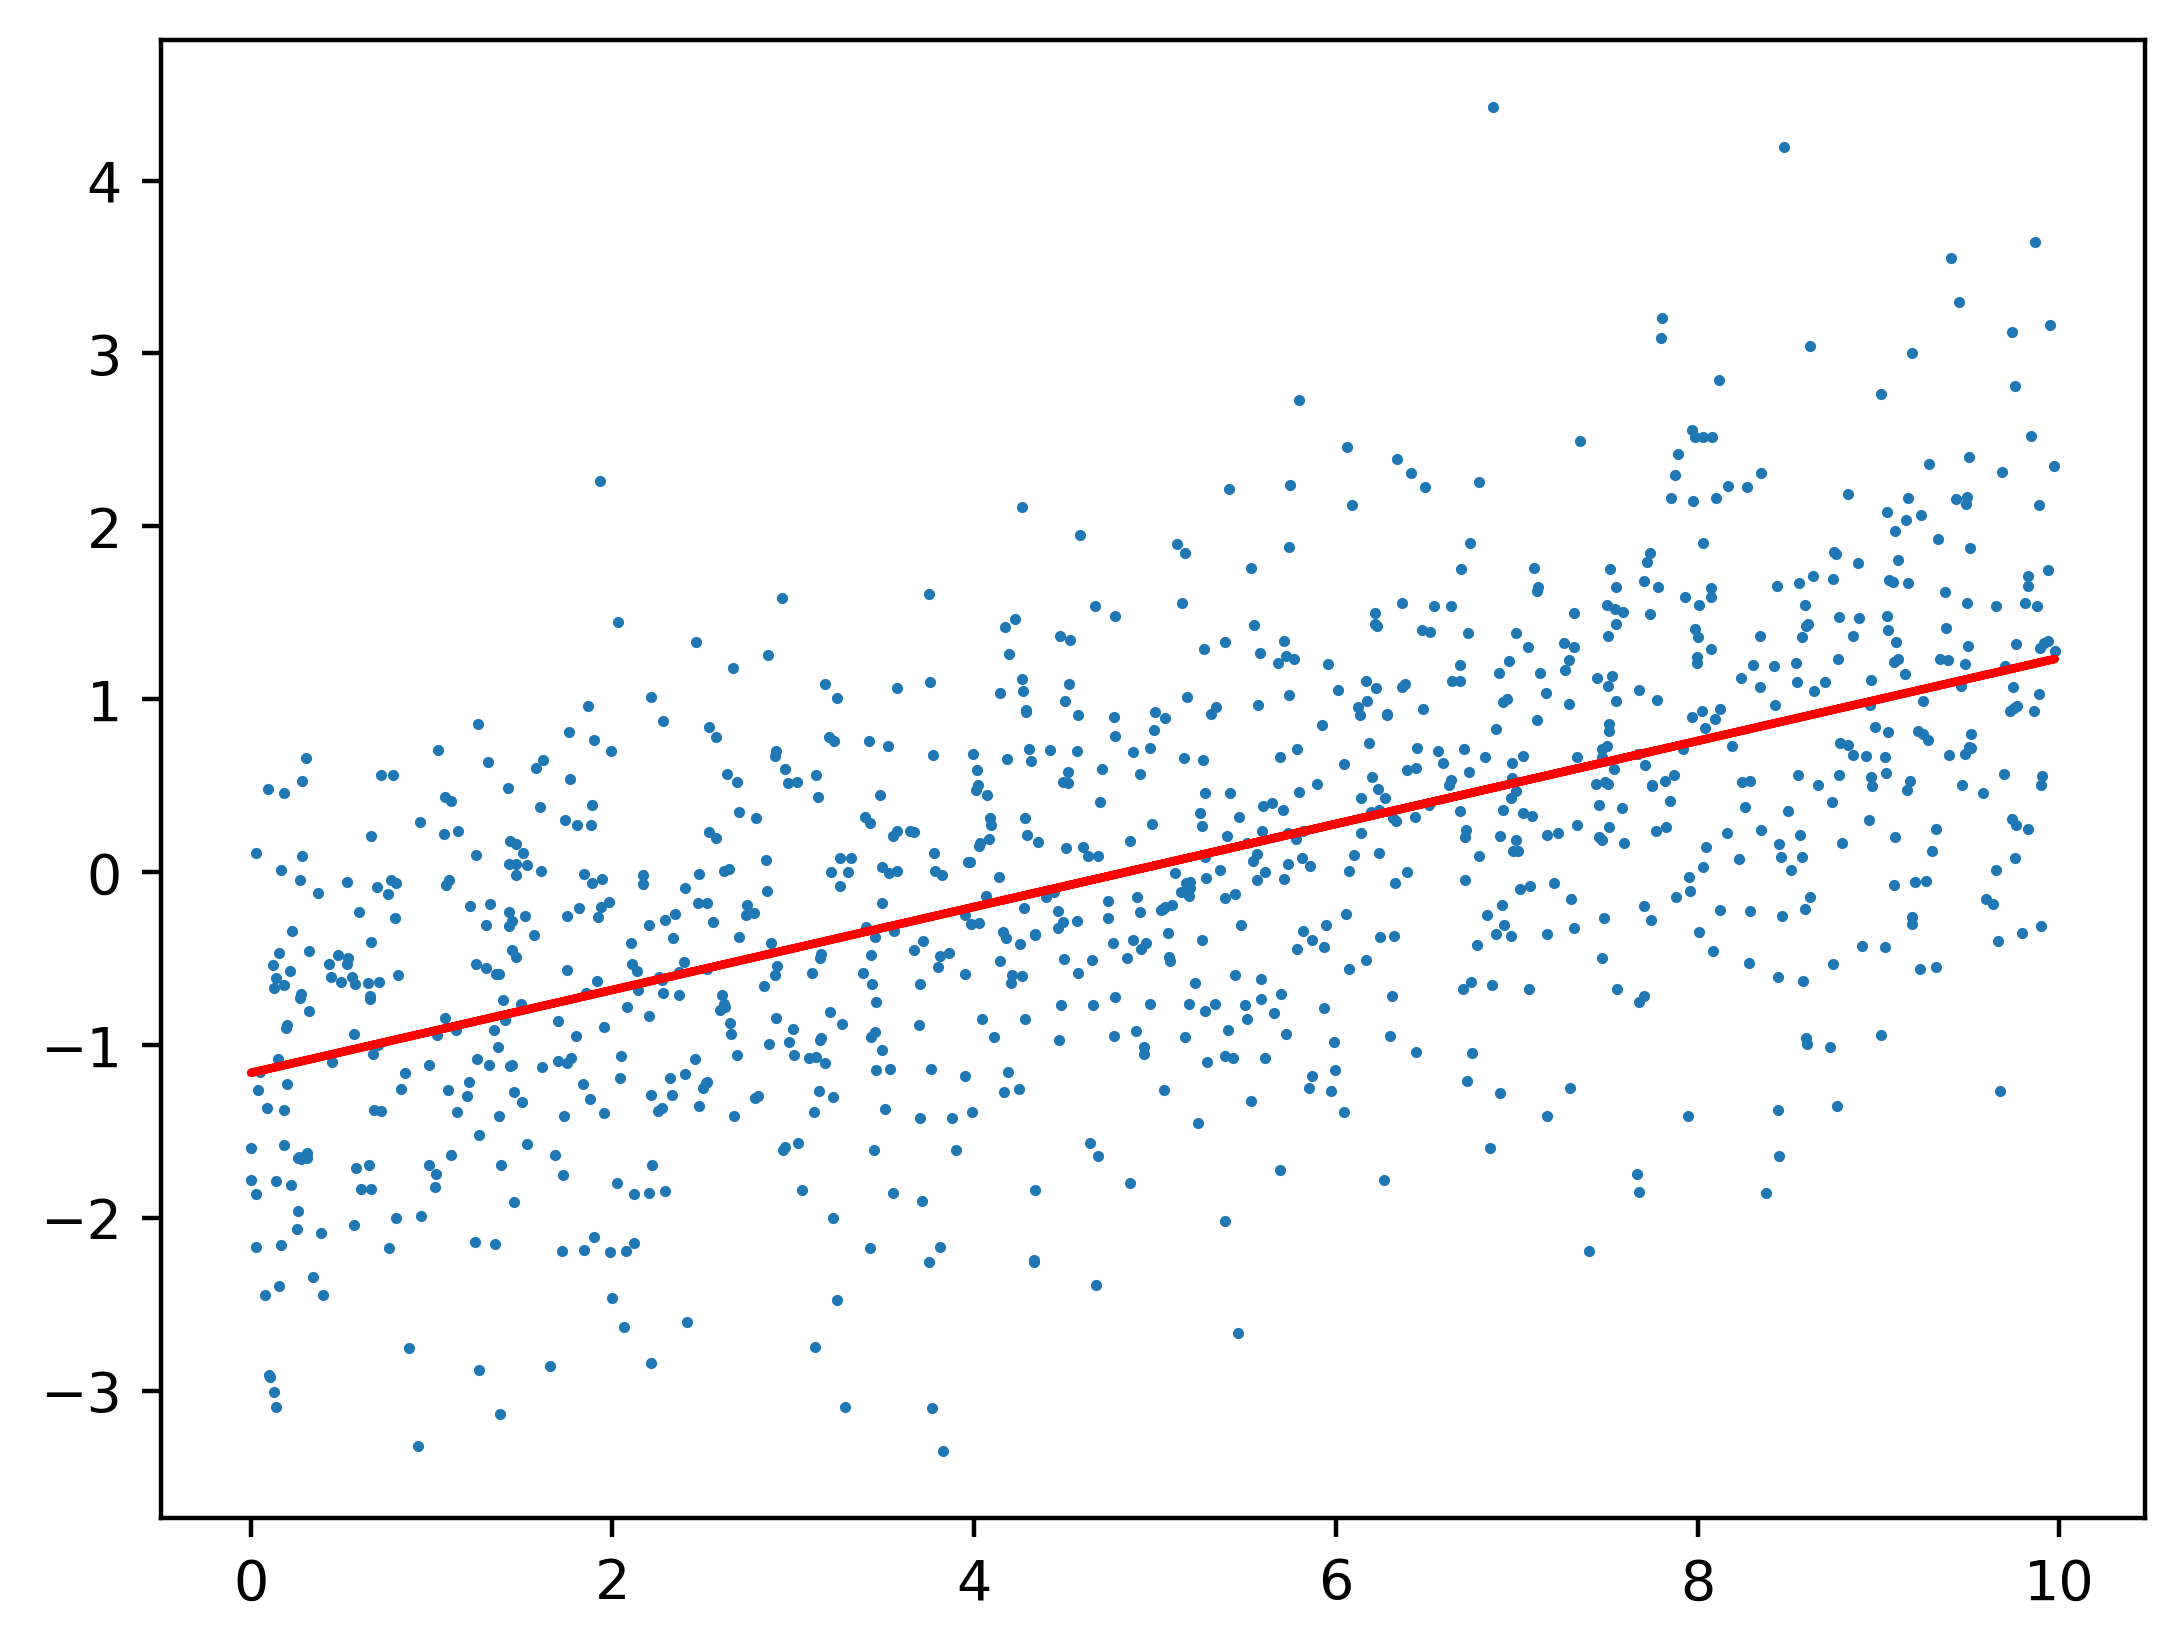

In [26]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

## Métricas de desempenho do modelo para classificação binária
#### Dividindo os dados: conjuntos de treinamento e teste
Divida os dados em treinamento (80%) e teste (20%). Apresente métricas usando pontuações de testes.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [31]:
np.mean(y_train)

0.223102526838873

In [32]:
np.mean(y_test)

0.21657603600225014

### Precisão de classificação


In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                               max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                               tol=0.0001, verbose=0, warm_start=False)

In [37]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [38]:
y_pred = example_lr.predict(X_test)

#### Acurácia

In [39]:
is_correct = y_pred == y_test

In [40]:
np.mean(is_correct)

0.7834239639977498

In [41]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [42]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

## Exercício 9: Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Python


In [44]:
P = sum(y_test)
P

1155

In [46]:
TP = sum((y_test==1) & (y_pred==1))
TP

0

In [47]:
TPR = TP/P
TPR

0.0

In [48]:
FN = sum((y_test==1) & (y_pred==0))
FN

1155

In [49]:
FNR = FN/P
FNR

1.0

No conjunto de teste, pelo menos para as amostras positivas, na verdade o modelo agiu como um modelo nulo de classe majoritária. Todas as amostras positivas foram previstas como negativas, logo, nenhuma delas foi prevista corretamente.

In [50]:
N = sum(y_test==0)
N

4178

In [51]:
TN = sum((y_test==0) & (y_pred==0))
TN

4178

In [52]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [53]:
TNR = TN/N
FPR = FP/N

print(f'A taxa de falso negativo foi {TNR} e a taxa de falso positivo foi {FPR} ')

A taxa de falso negativo foi 1.0 e a taxa de falso positivo foi 0.0 


In [54]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

## EXERCÍCIO 10: Obtendo probabilidade previstas a partir de um modelo de regressão logística

In [55]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [56]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [57]:
prob_sum.shape

(5333,)

In [58]:
np.unique(prob_sum)

array([1.])

In [59]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

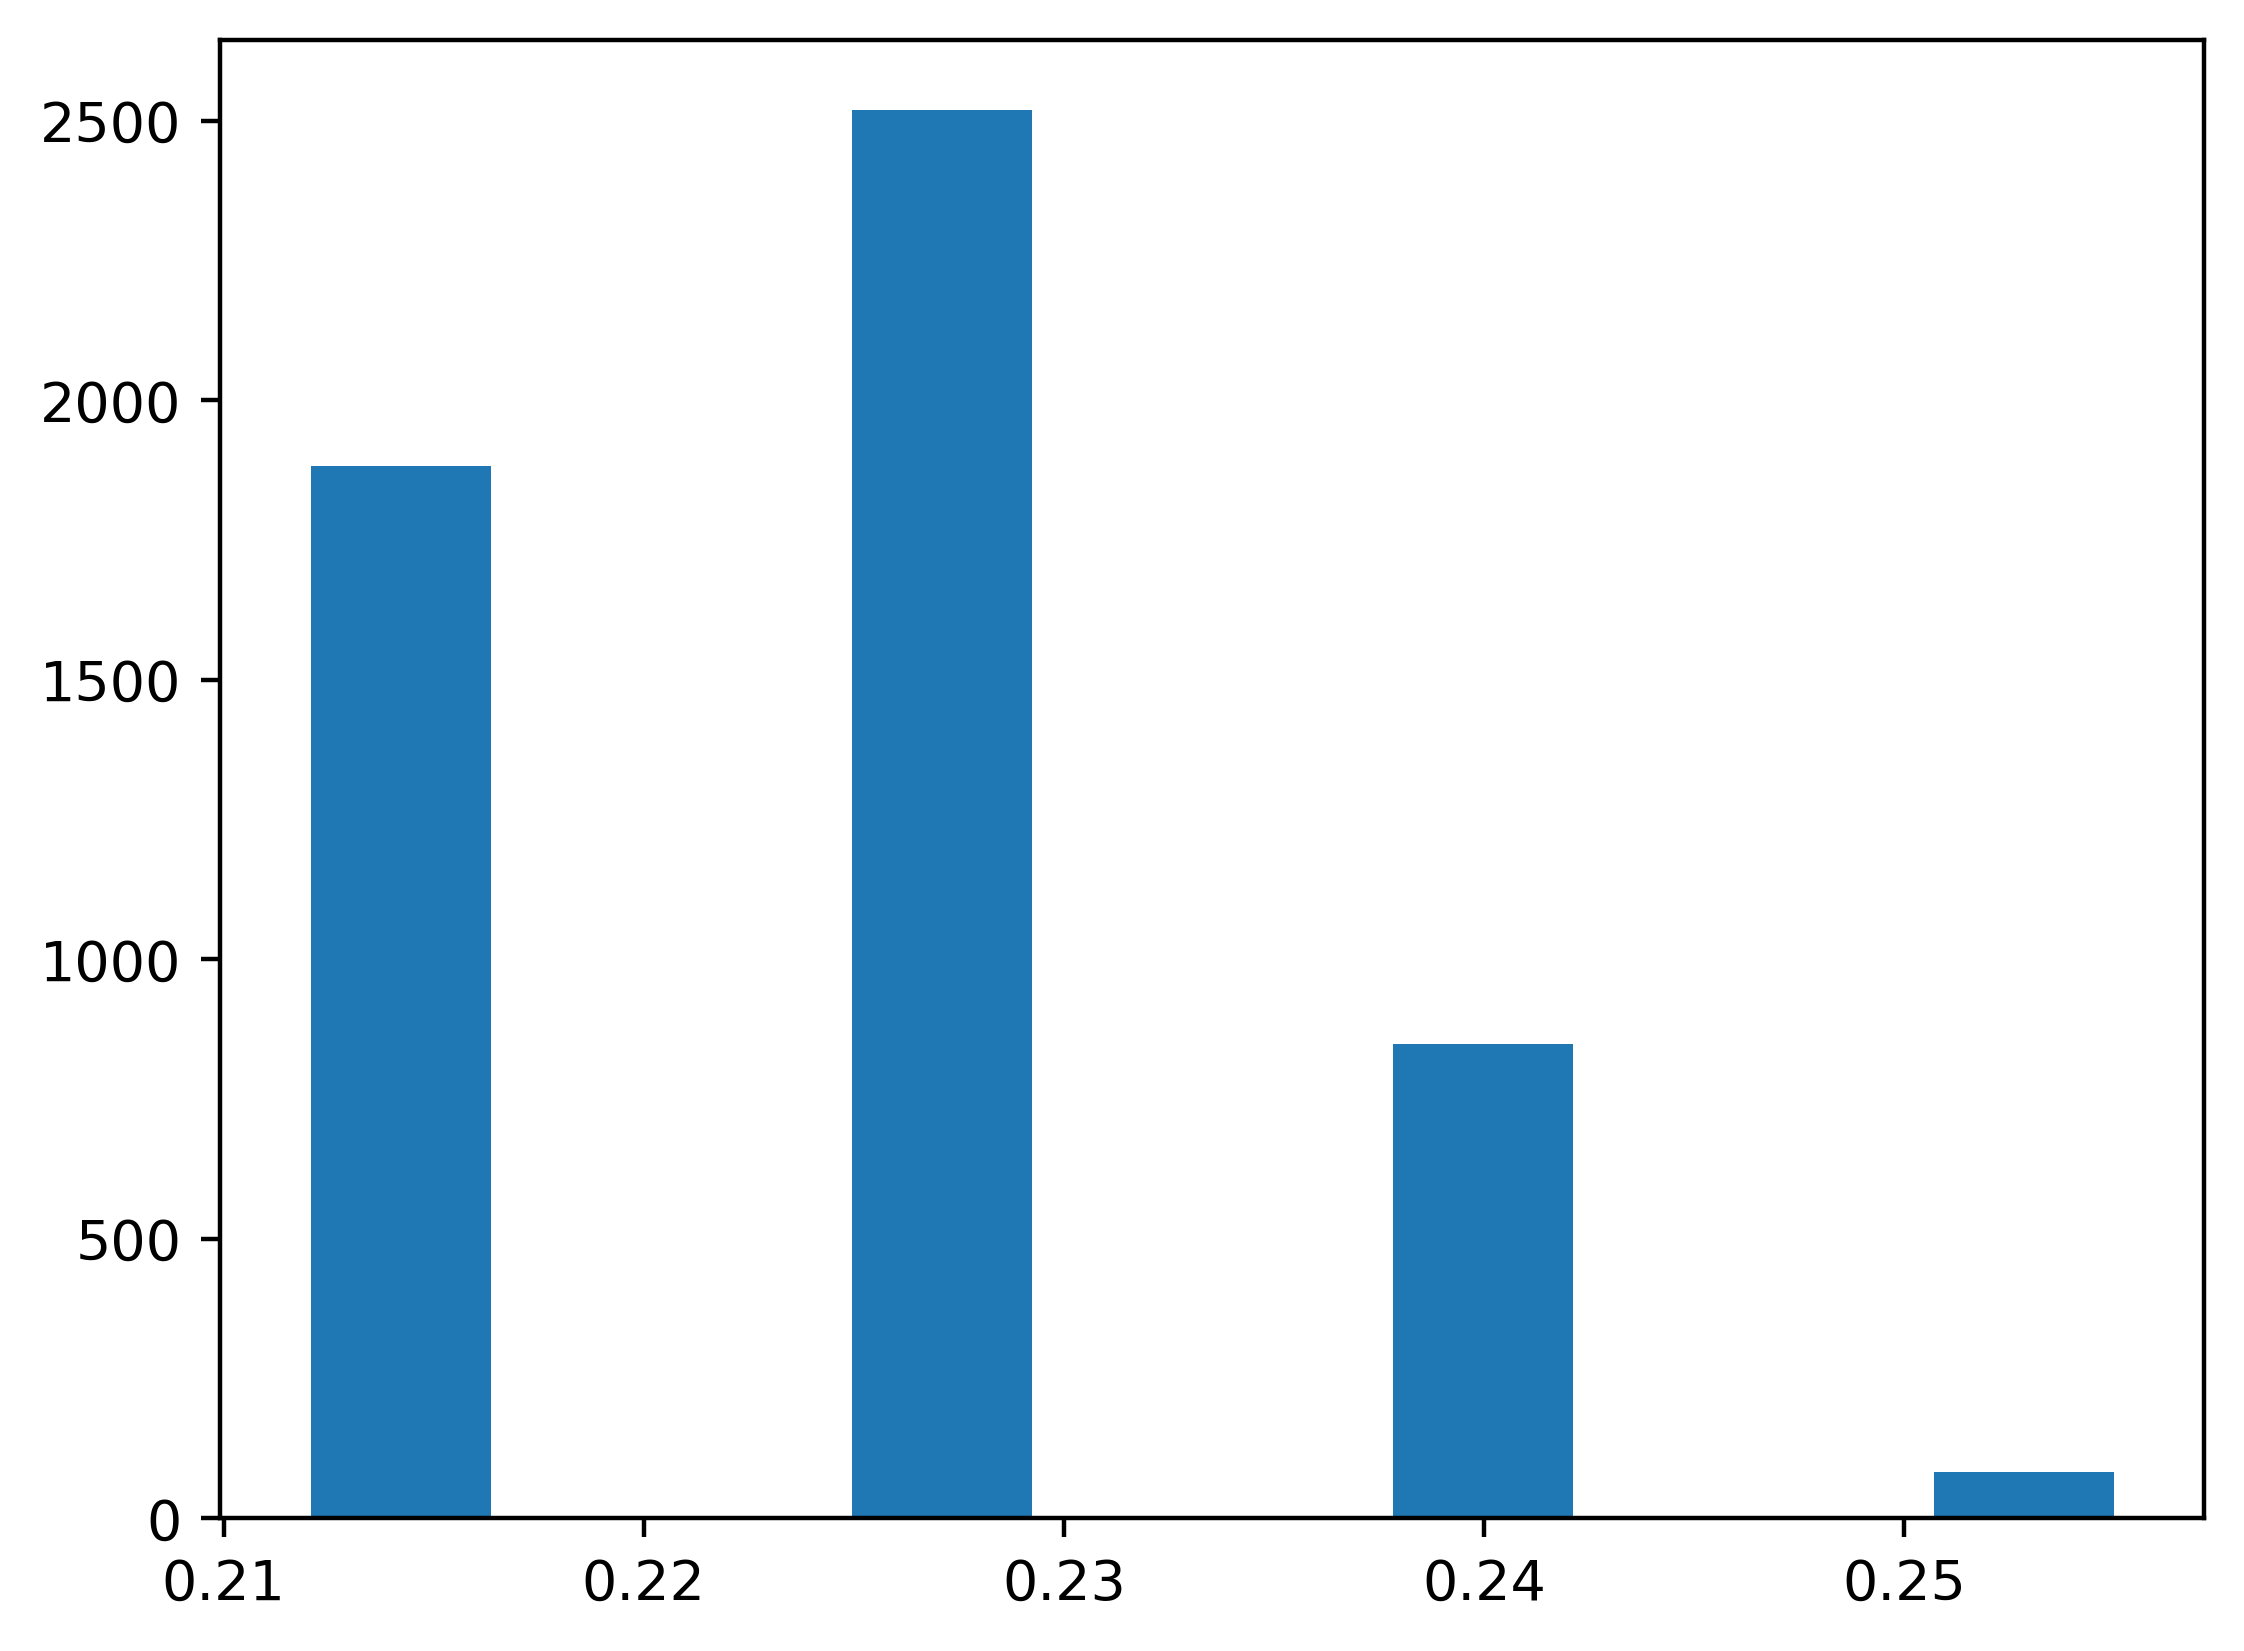

In [60]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

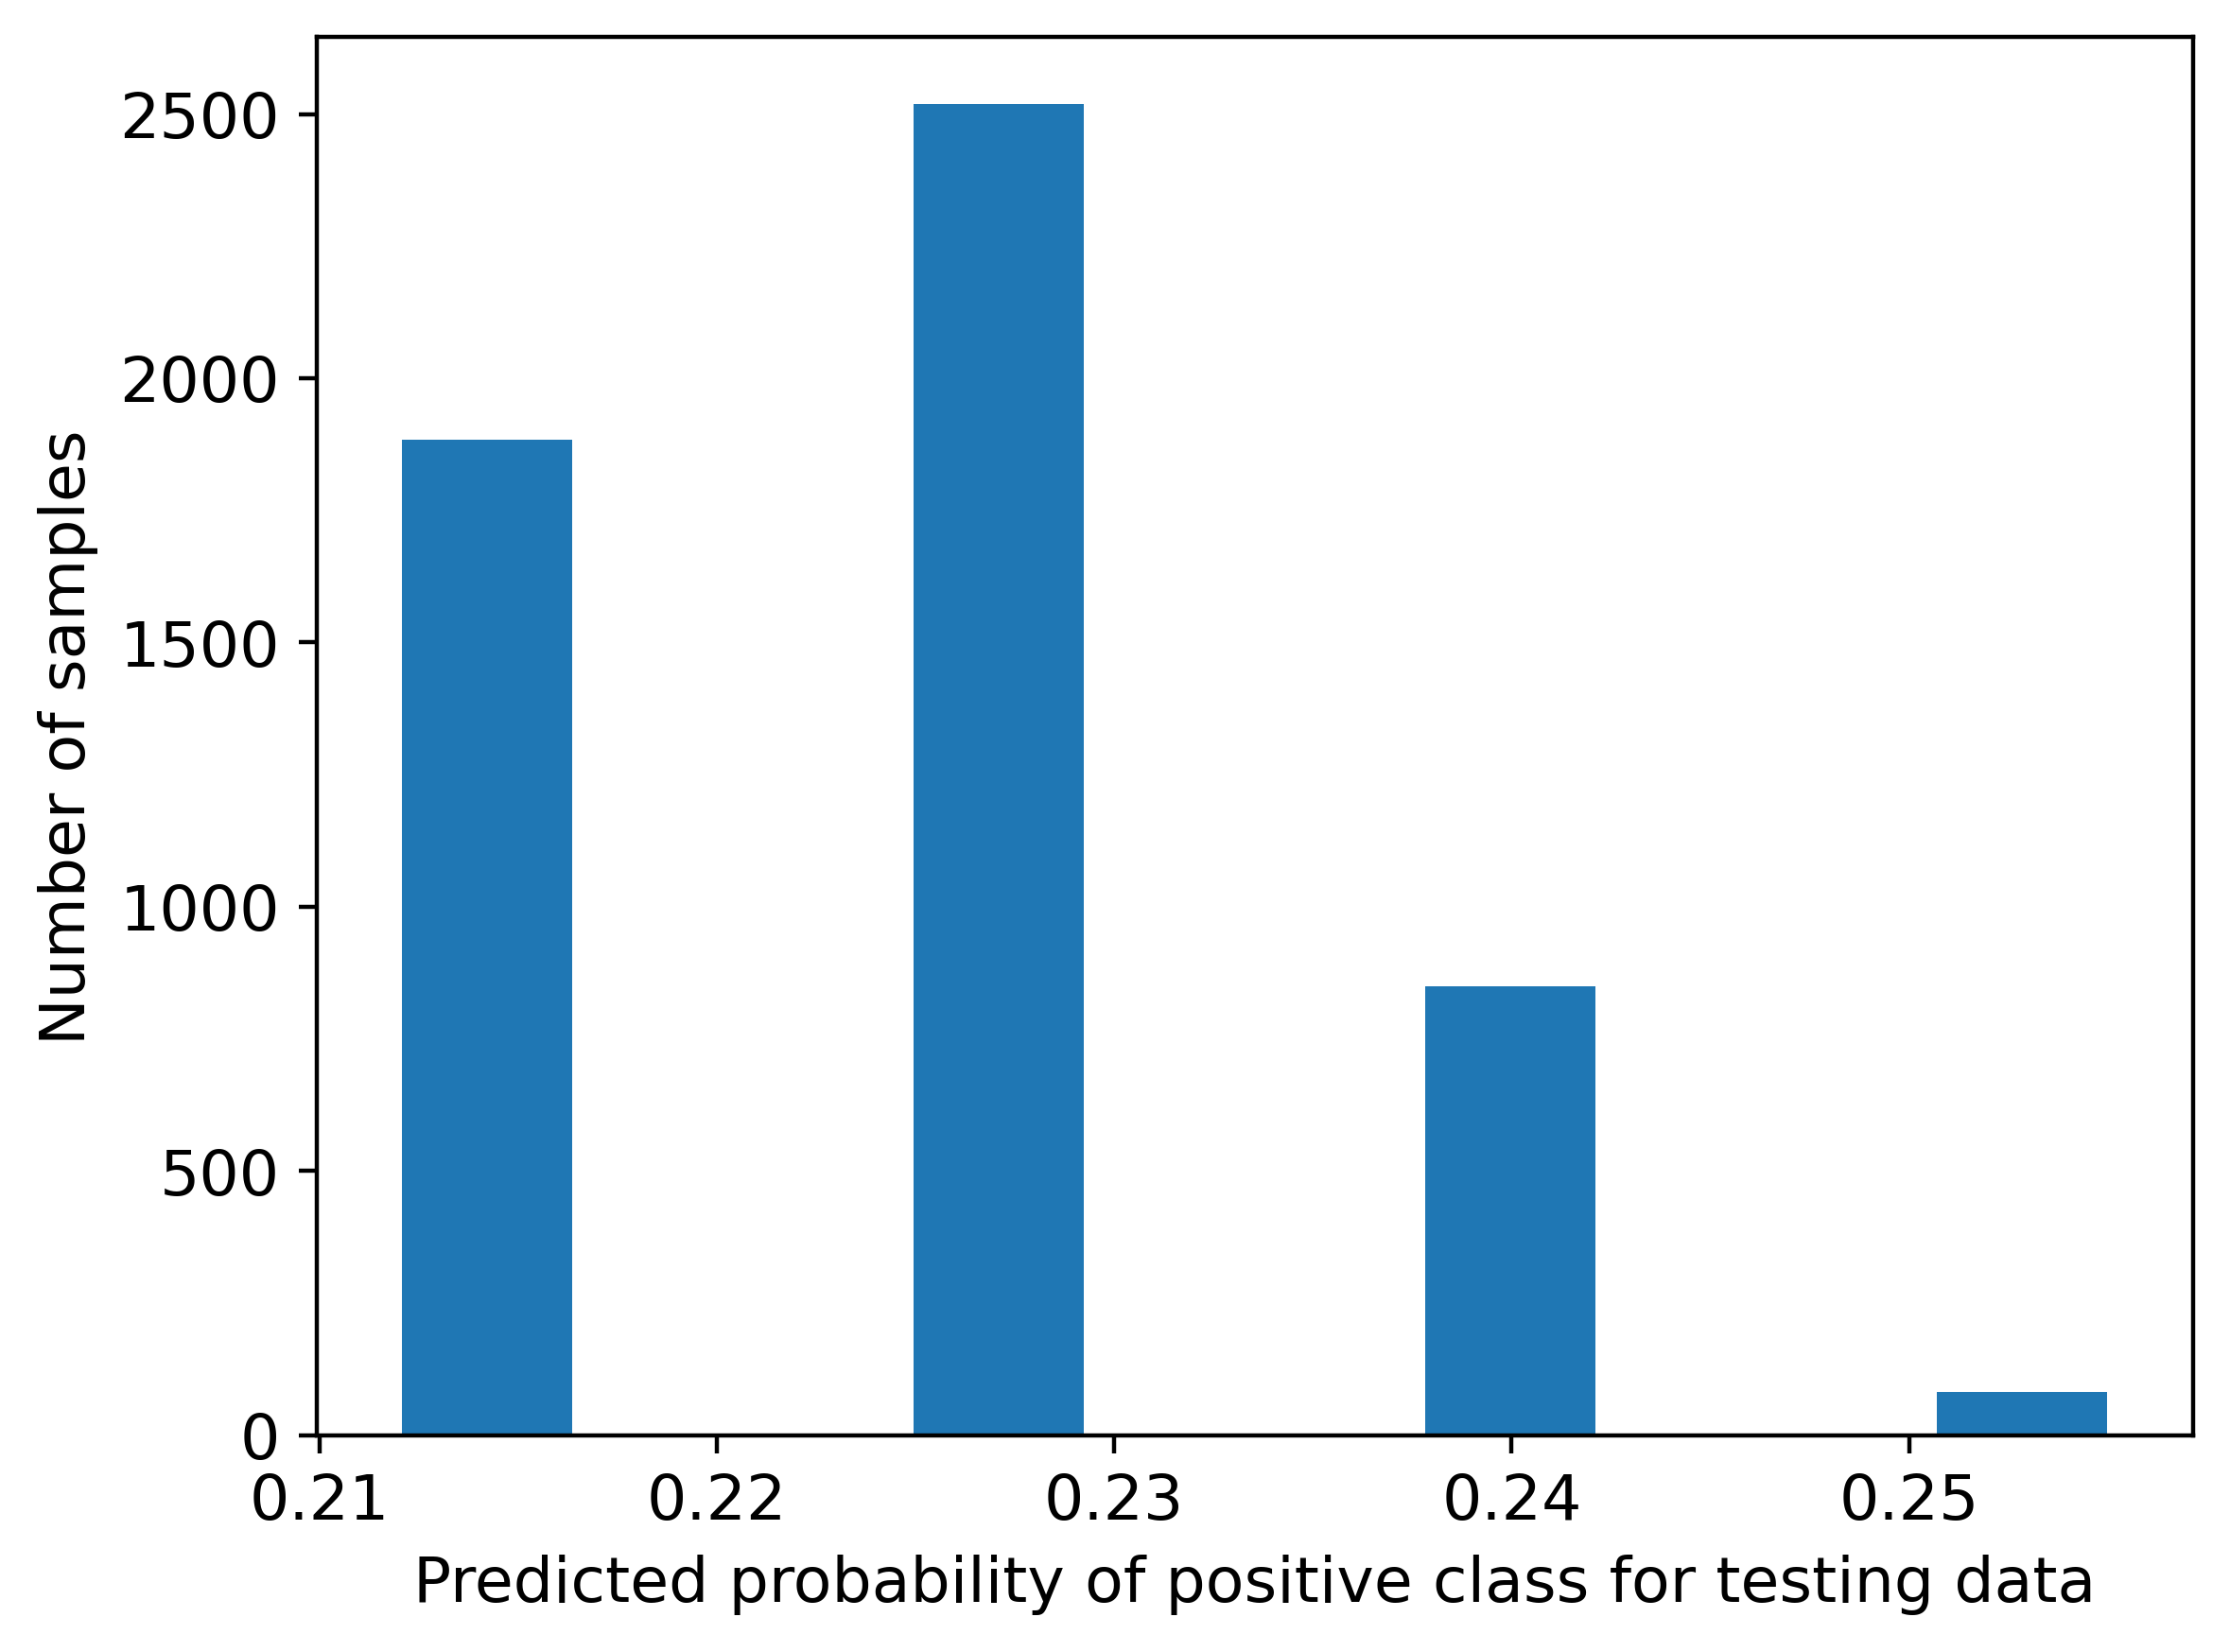

In [61]:
mpl.rcParams['font.size'] =12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [62]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

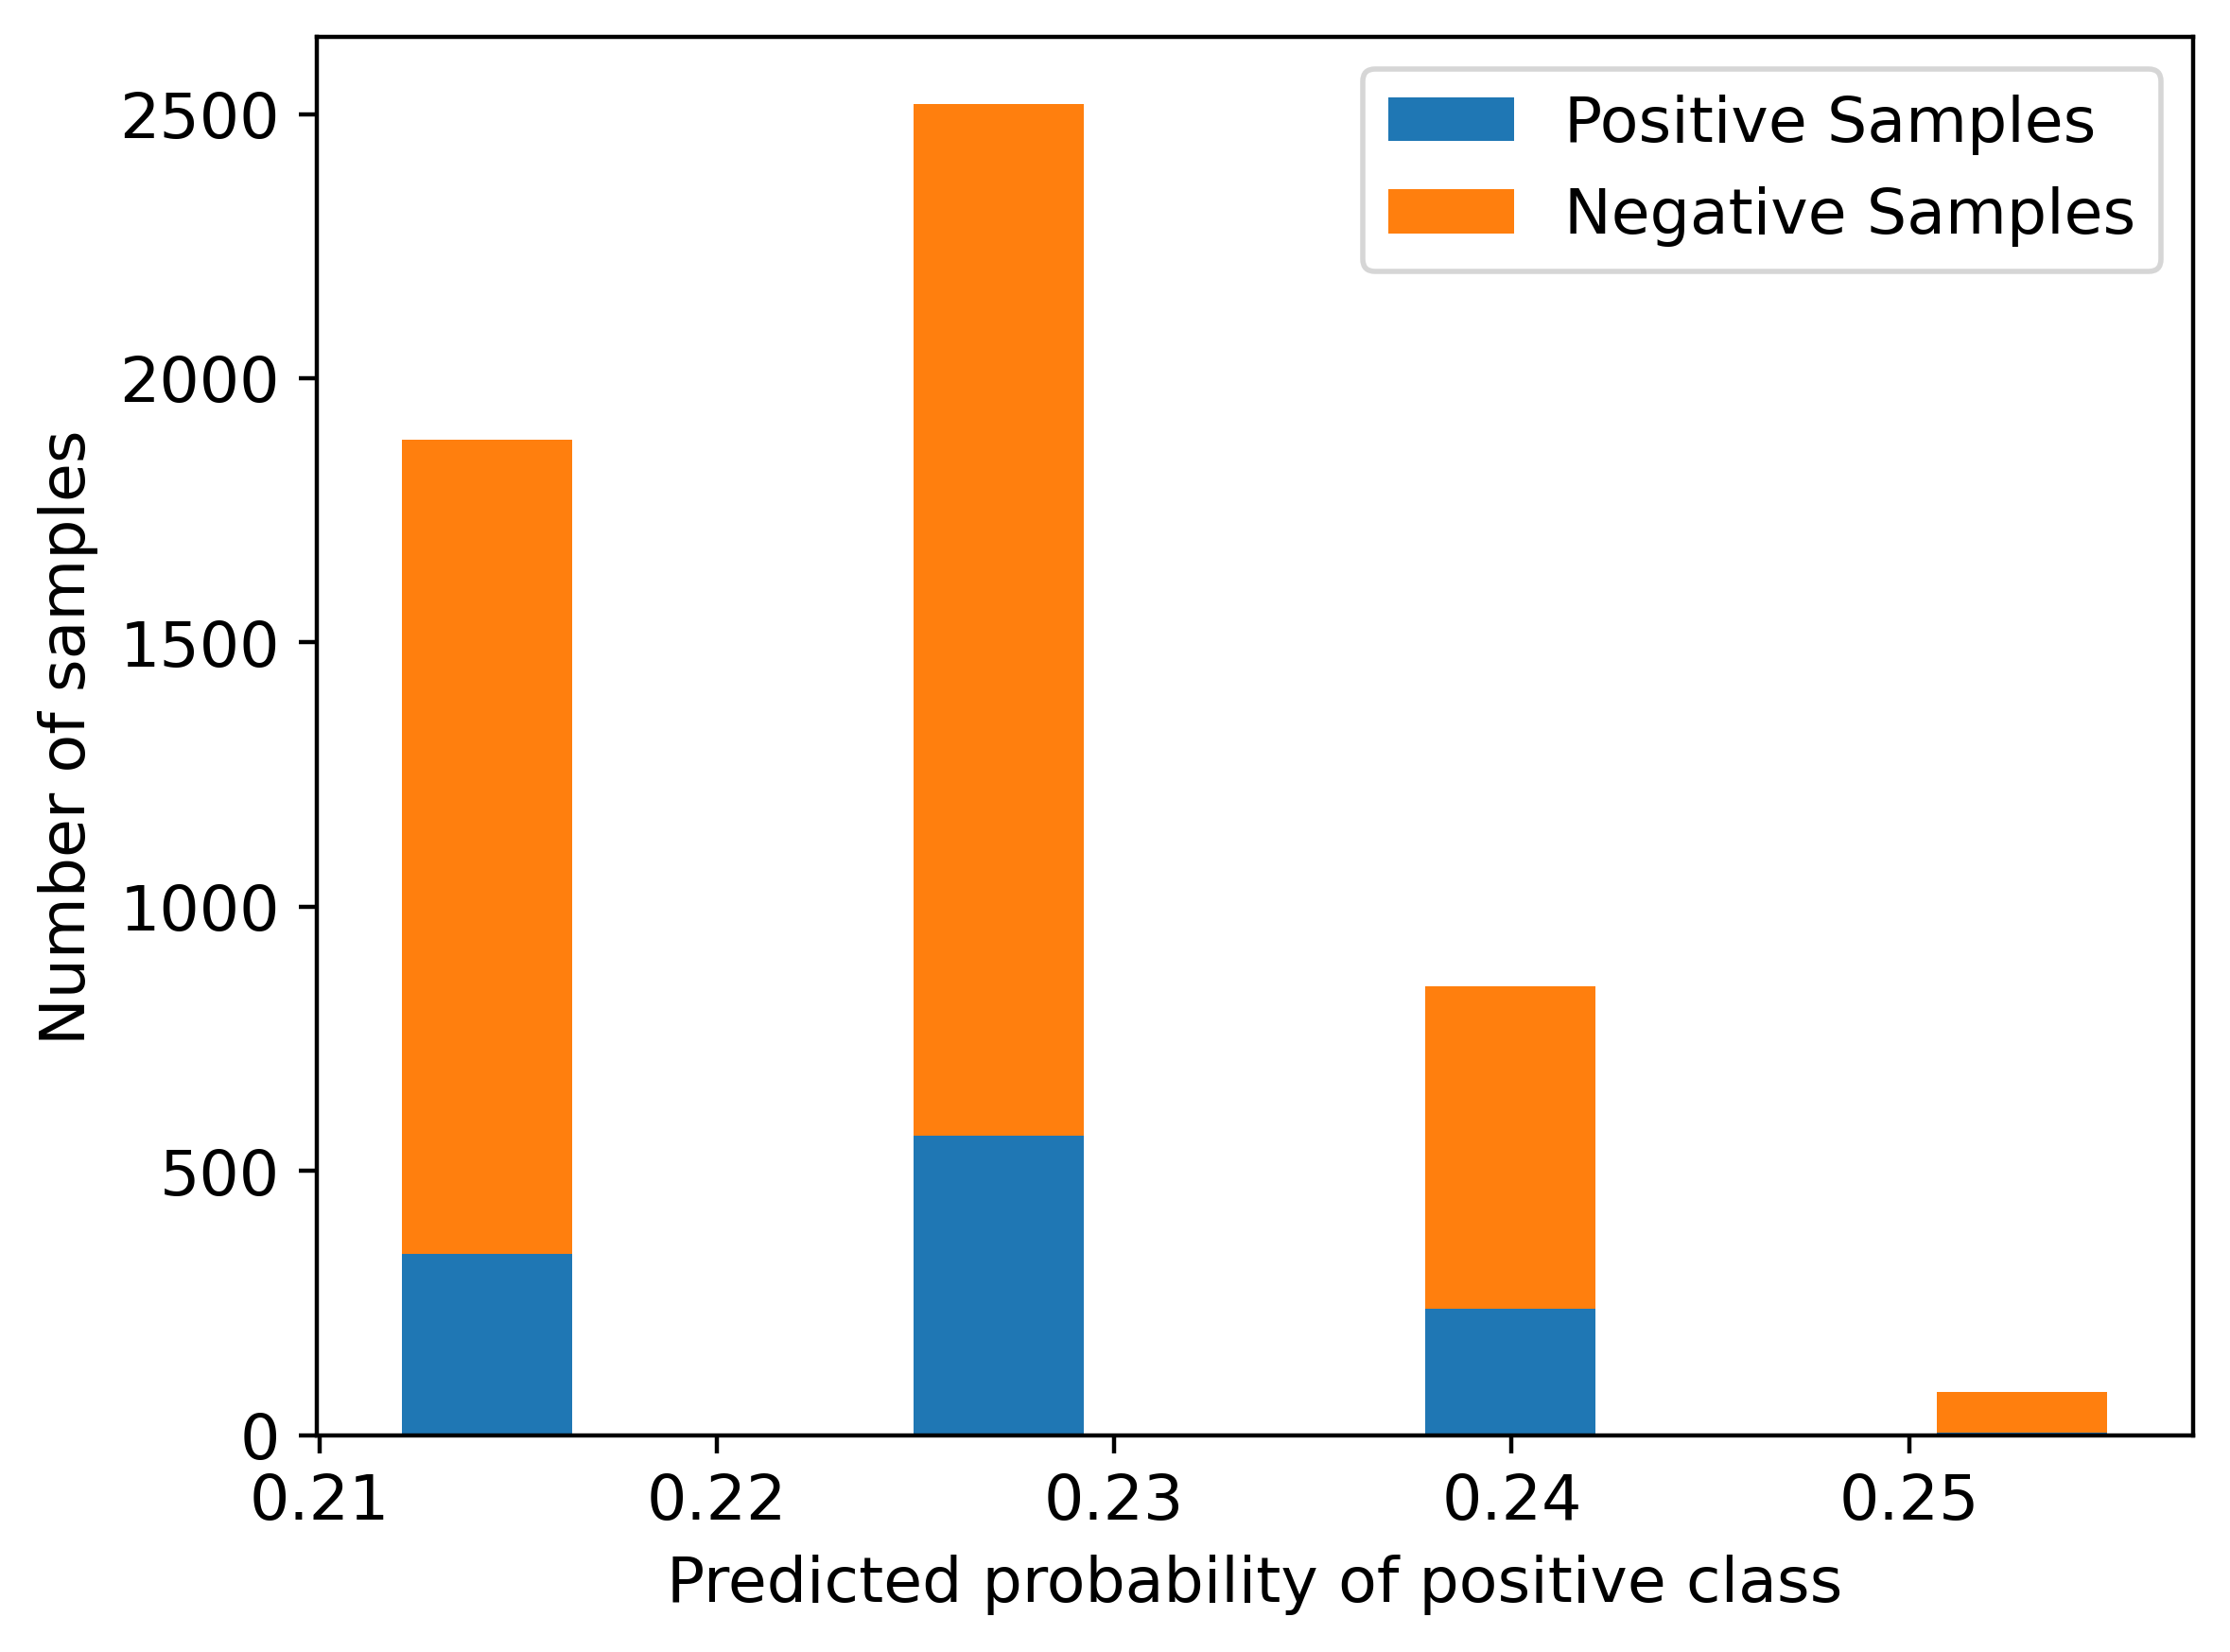

In [63]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

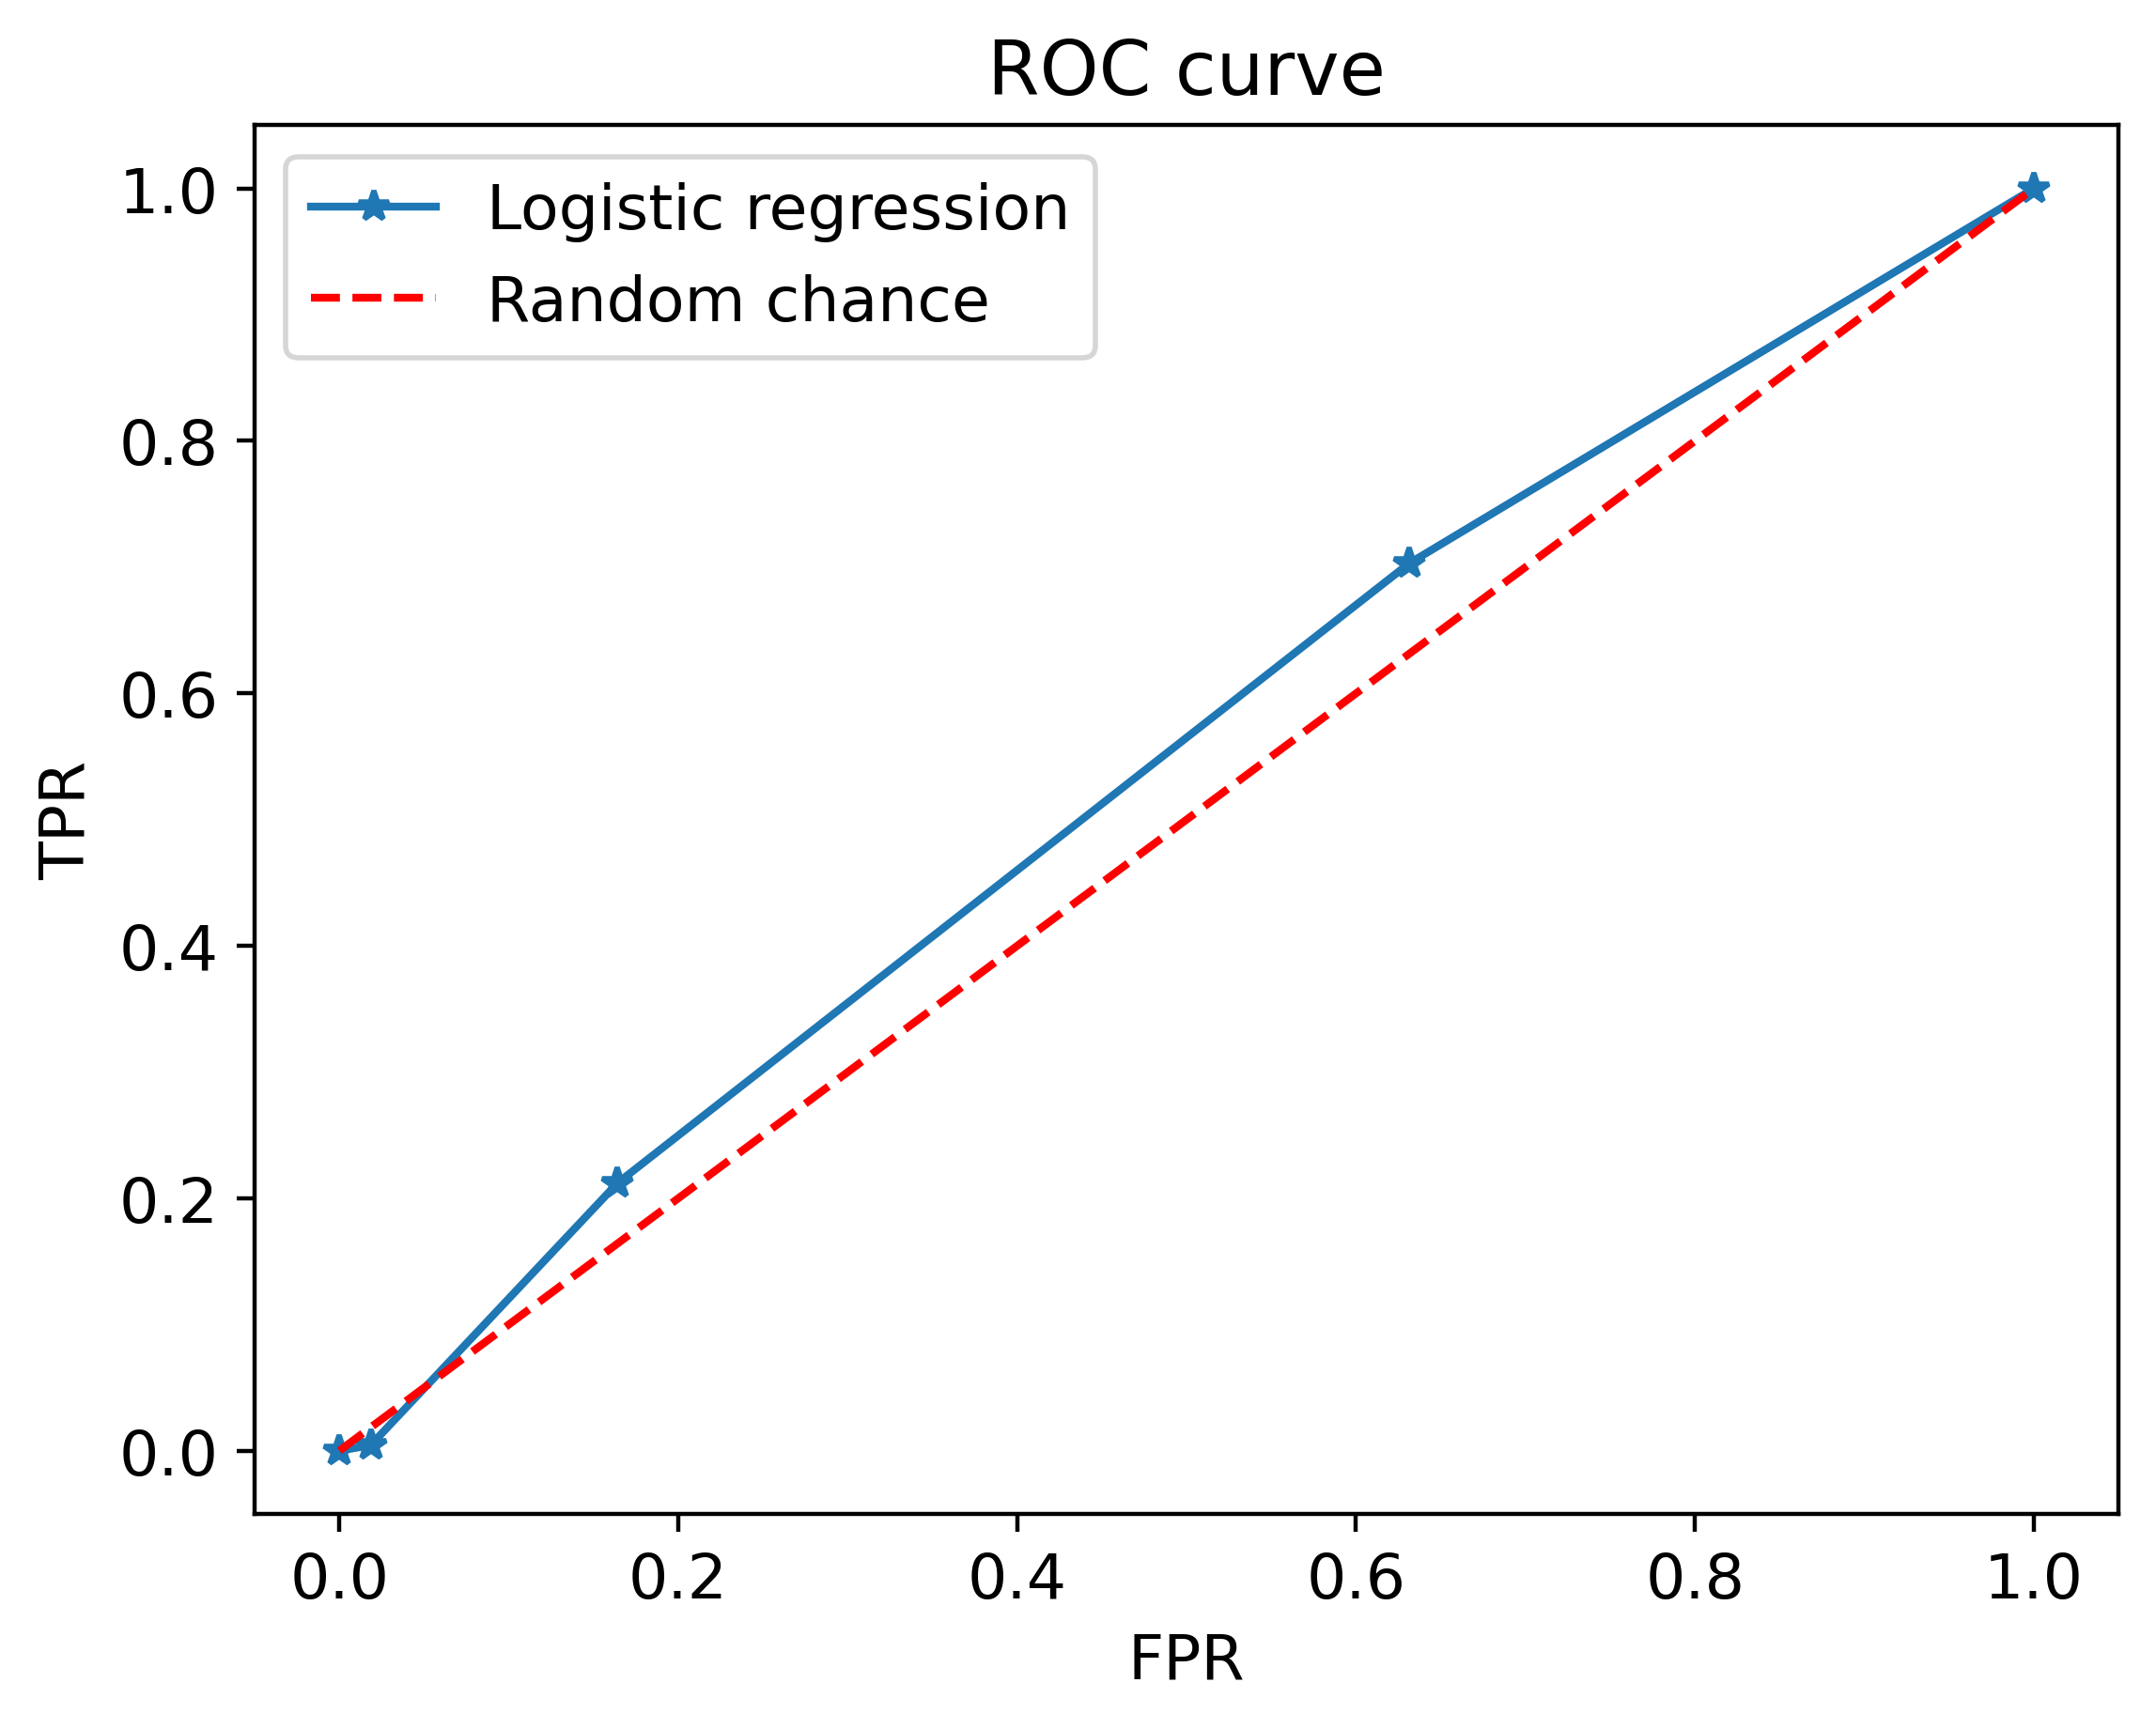

In [65]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [66]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [67]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

### Atividade 2: Executando a regressão Logística com uma nova característica e criando uma curva precision-recall

In [68]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [69]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [70]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [71]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [72]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

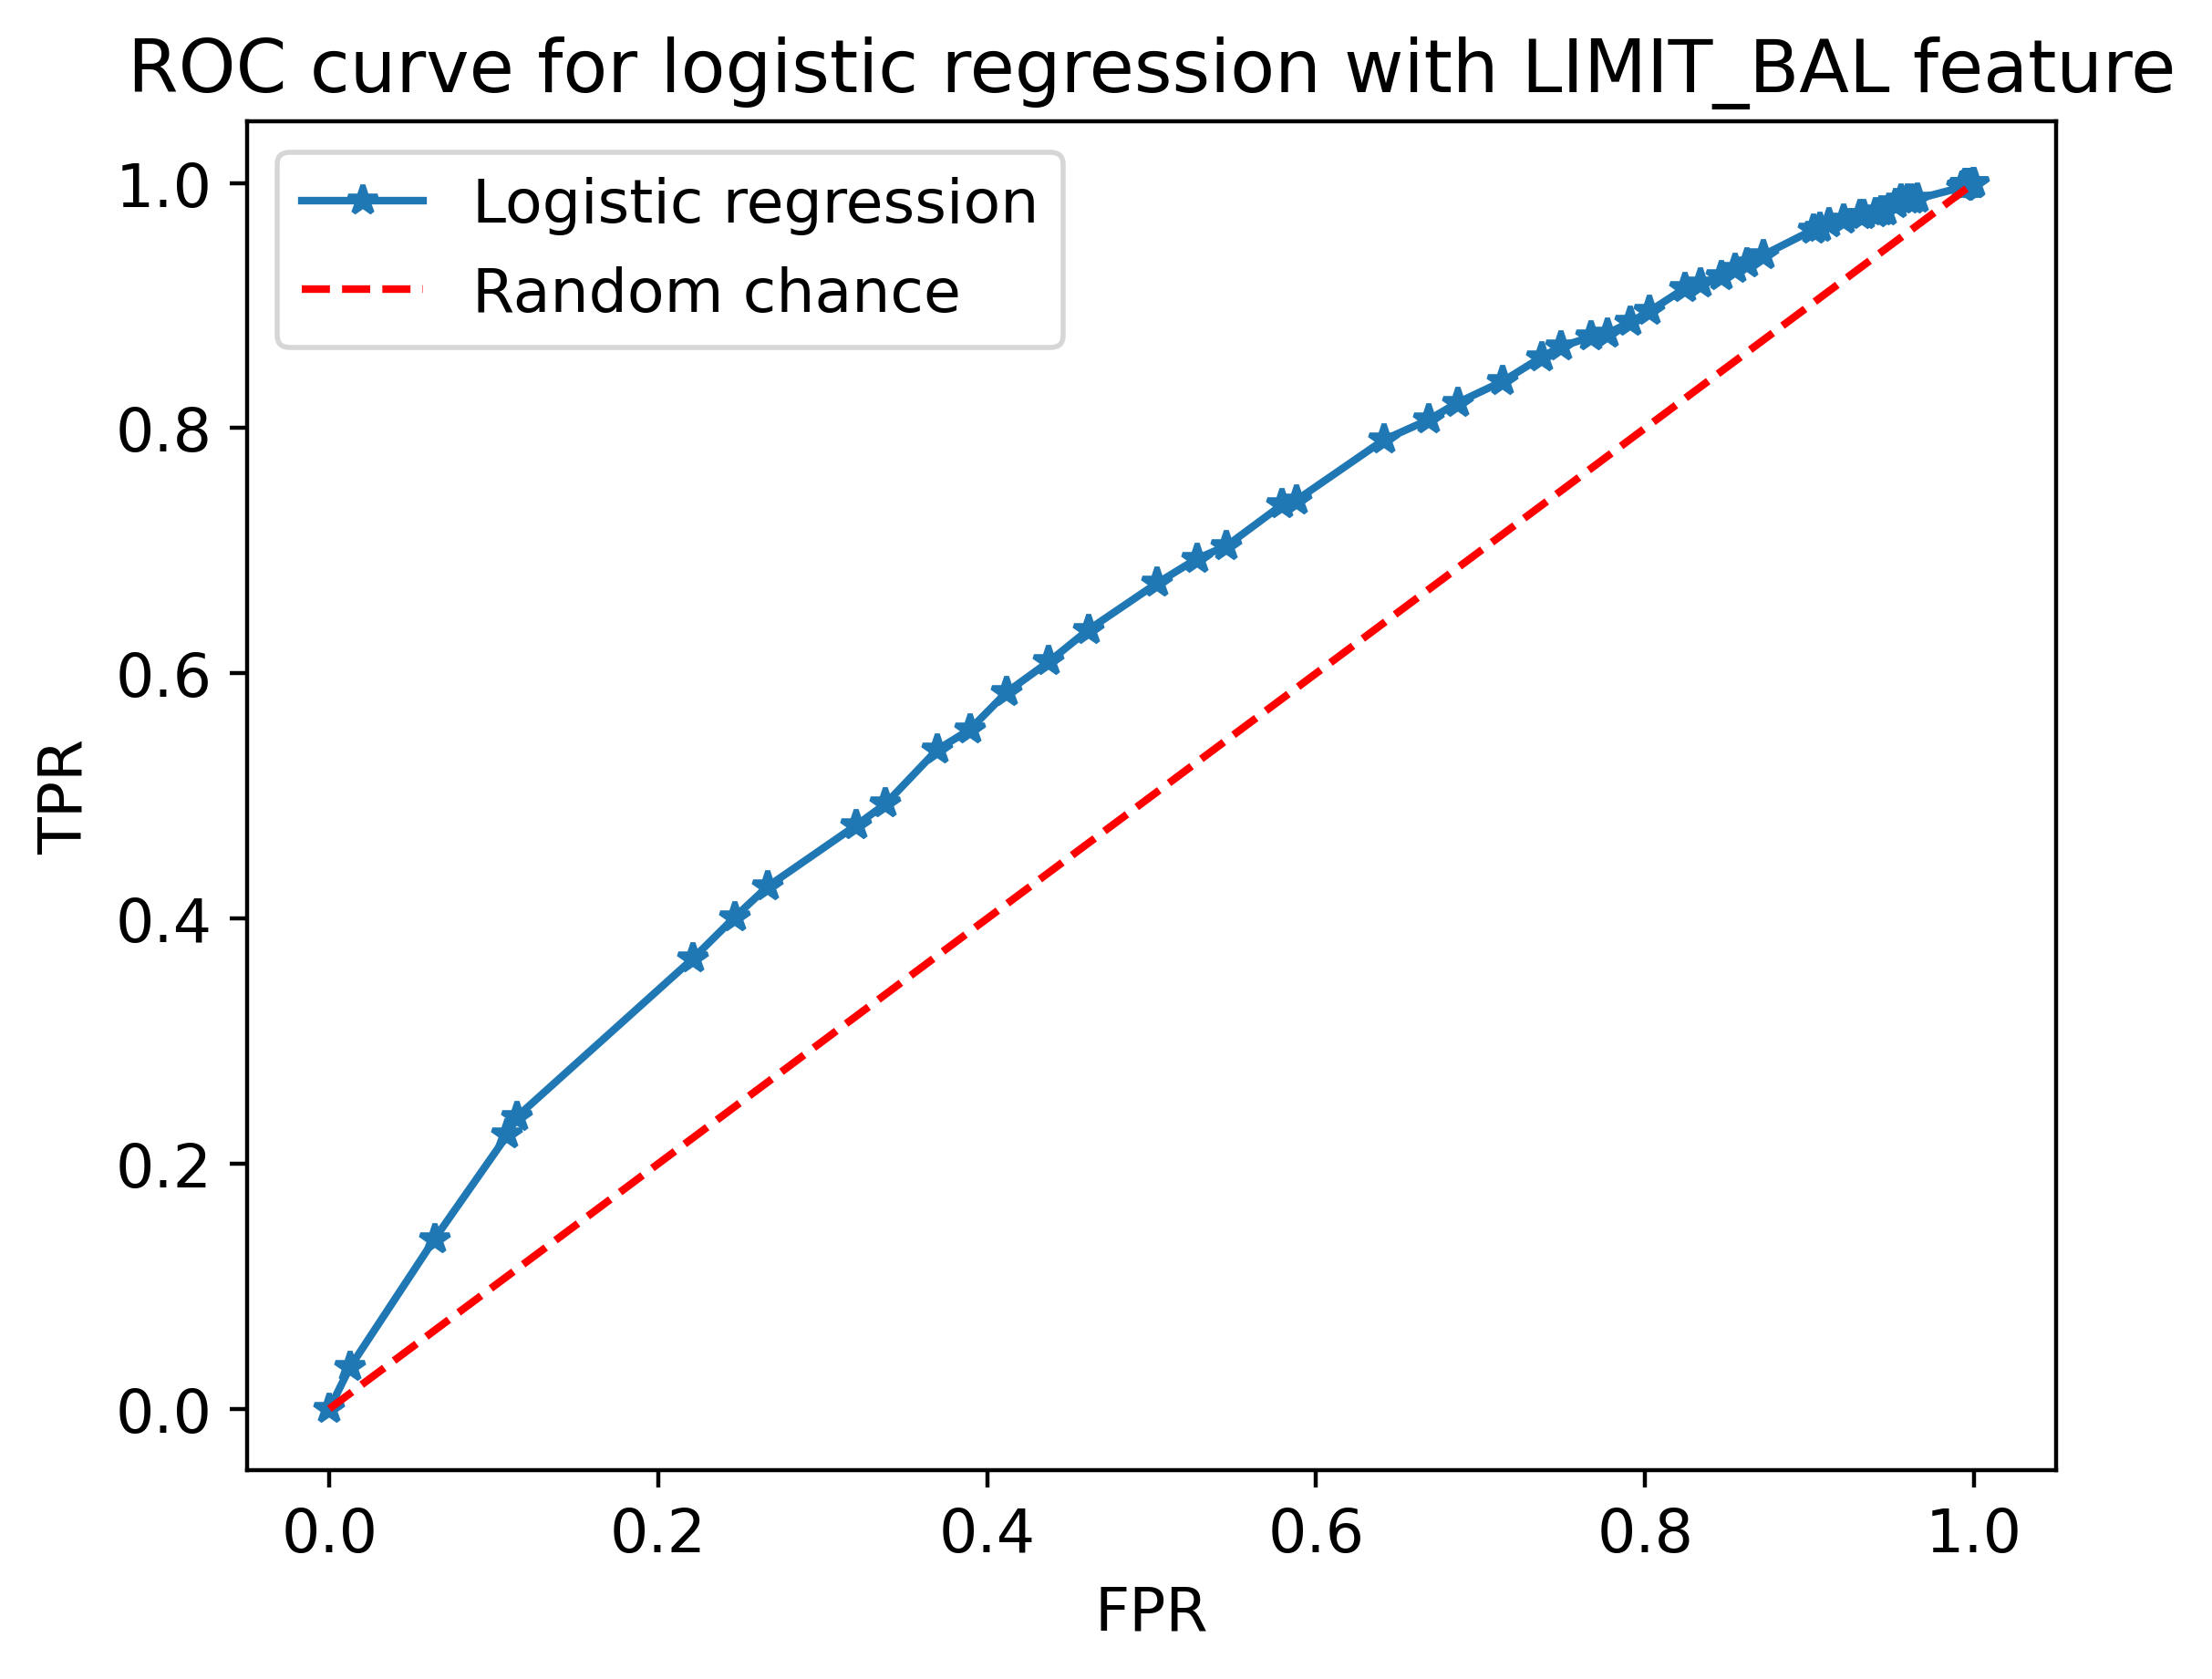

In [73]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [74]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

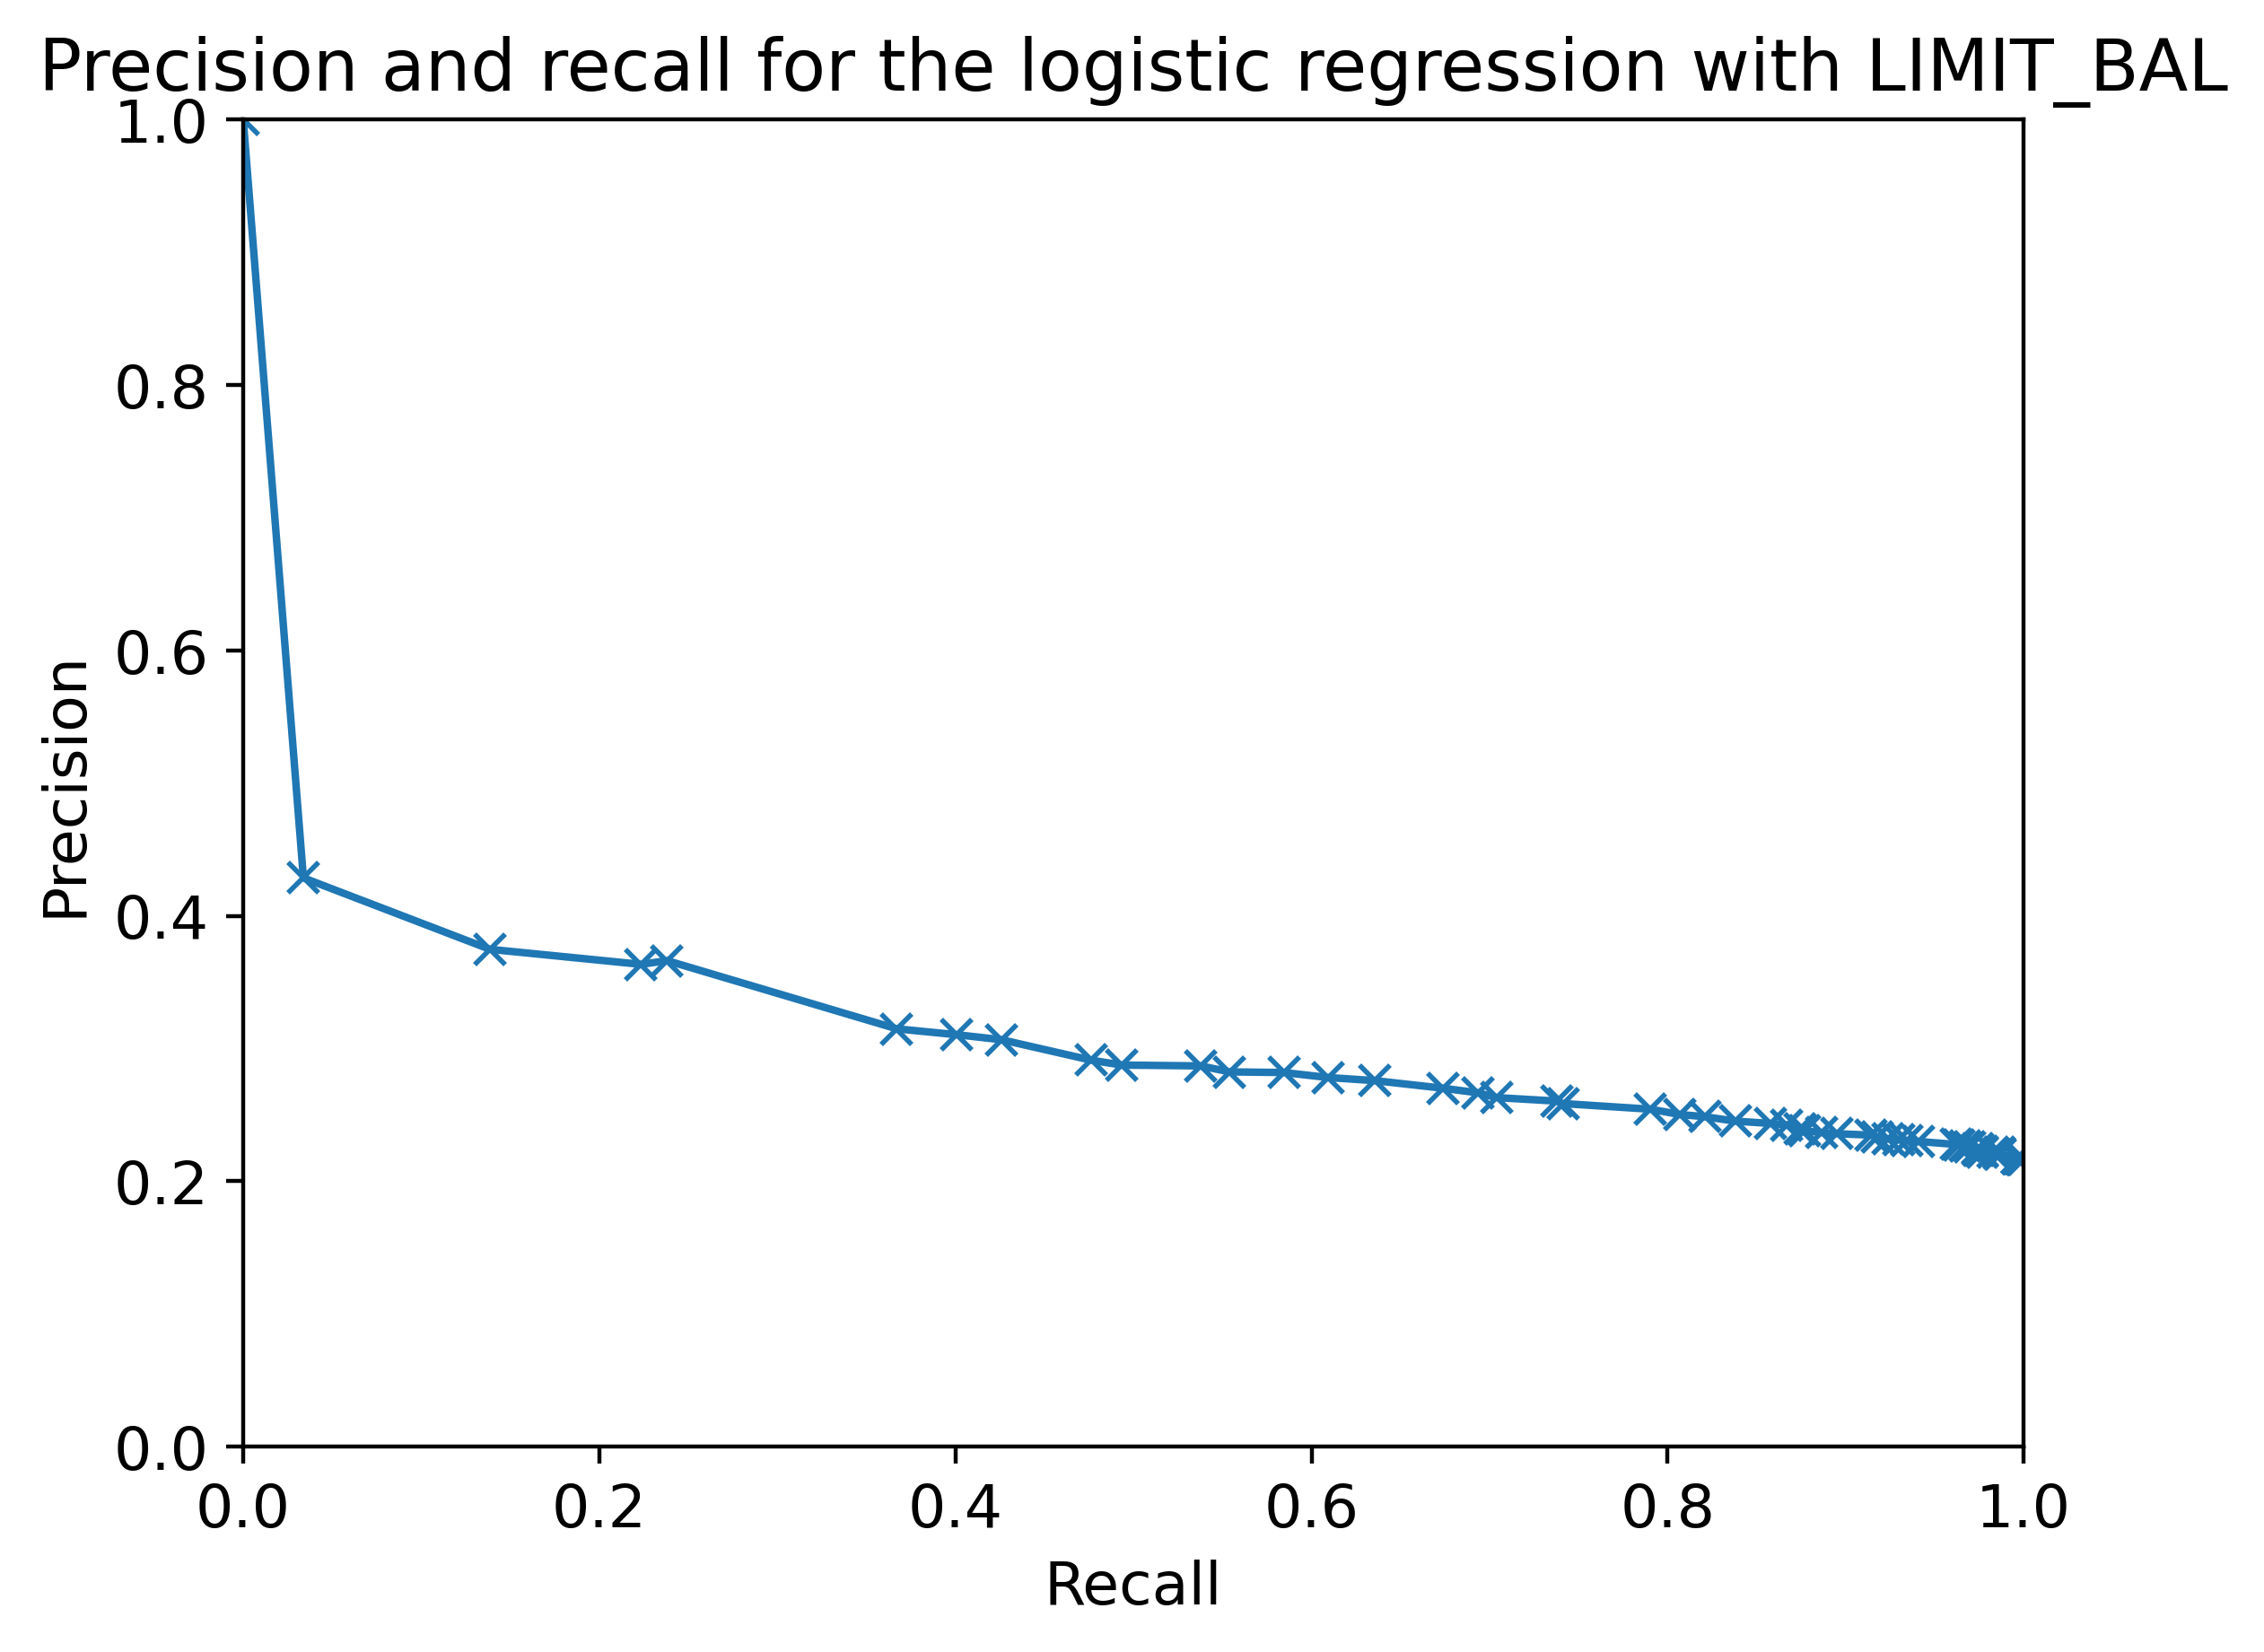

In [75]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [76]:
metrics.auc(recall, precision)

0.31566964427378624

In [77]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)


In [78]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])


0.6182918113358344